# `Student's t-test`
## Implementation of Students t-test in Python

## `Contents in this notebook`
- Exploratory Data Analysis
-  Data Visualization
- Hypothesis formation
- Selection of appropriate Hypothesis Testing method
- 95% Confidence Intervals
- Conclusion

### Import the required modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [4]:
directory="D:\Golf.csv"
data=pd.read_csv(directory)

### Exploratory Data Analysis

In [5]:
data.head(10)     # This views the top 10 Records in the DataFrame

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262
5,283,251
6,258,262
7,266,289
8,259,286
9,270,264


### Divide the dataset into Current and New 

In [6]:
current=data['Current']
current.describe()

count     40.000000
mean     270.275000
std        8.752985
min      255.000000
25%      263.000000
50%      270.000000
75%      275.250000
max      289.000000
Name: Current, dtype: float64

In [7]:
new=data['New']
new.describe()

count     40.000000
mean     267.500000
std        9.896904
min      250.000000
25%      262.000000
50%      265.000000
75%      274.500000
max      289.000000
Name: New, dtype: float64

### Data Visualization using Scatterplot

Text(0.5, 0, 'Serial number')

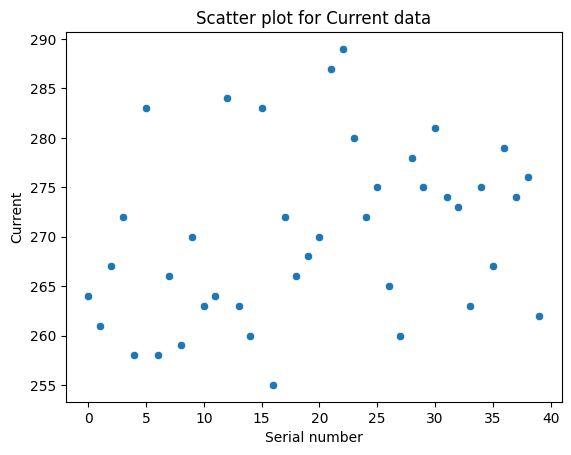

In [8]:
sns.scatterplot(data=current)
plt.title('Scatter plot for Current data')
plt.xlabel('Serial number')

Text(0.5, 0, 'Serial number')

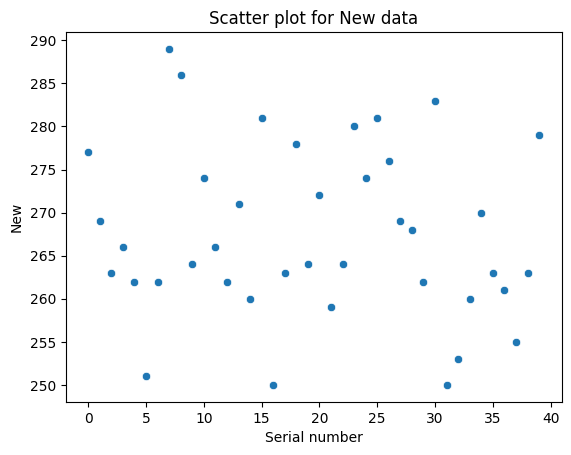

In [9]:
sns.scatterplot(data=new)
plt.title('Scatter plot for New data')
plt.xlabel('Serial number')

<AxesSubplot: xlabel='New', ylabel='Count'>

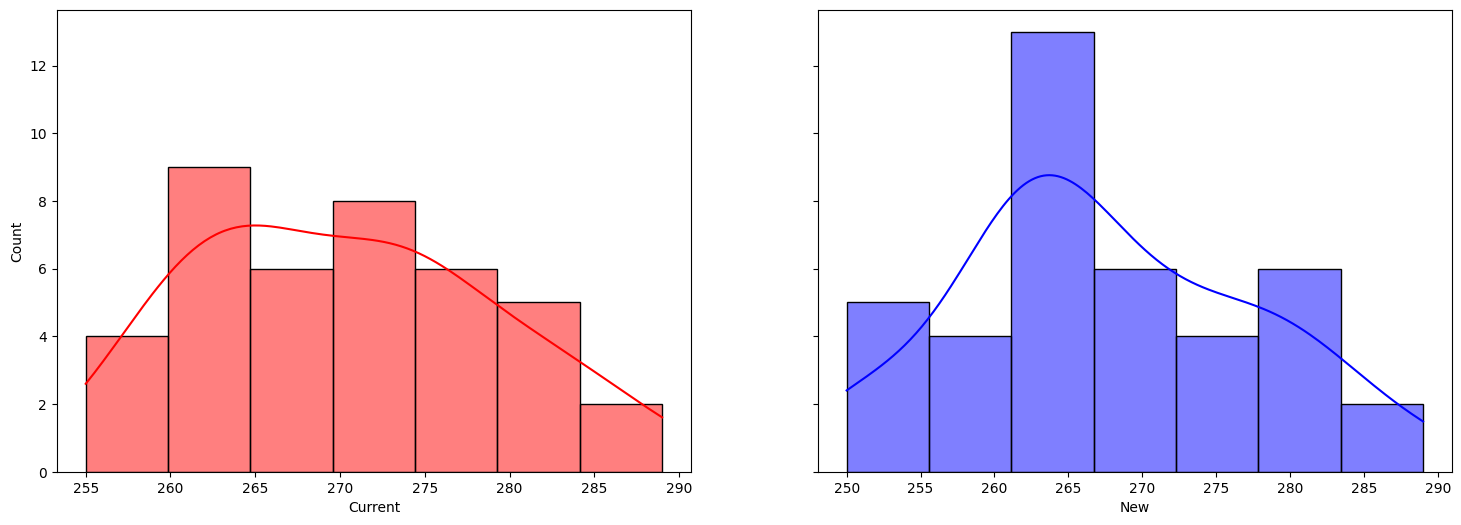

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x=current, kde=True, color='r')
sns.histplot(data, ax=axes[1], x=new, kde=True, color='b')

<AxesSubplot: >

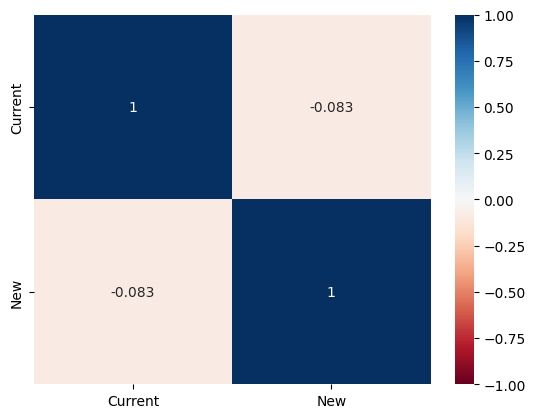

In [11]:
corr=data.corr()
sns.heatmap(corr,cmap='RdBu', vmin=-1, vmax=1, annot=True)

### Null and Alternate Hypothesis
The level of significance (α) = 0.05. <br>
The sample size , N = 40 which is large for a Zstat Test for 1 sample.<br>
But since there are two independent samples, we have to use a Tstat test.<br>
Degree of Freedom: Since the sample is the same for both Sampling tests, we have (N-1)*2 degrees of freedom : 78<br>
Null Hypothesis:
- It is a hypothesis/status quo that says there is no statistical significance between the two variables.
- The null hypothesis is formulated such that the rejection of the null hypothesis proves the alternative hypothesis is true.

Alternate Hypothesis:
- It is one that states there is a statistically significant relationship between two variables.
- The alternative hypothesis is the hypothesis used in hypothesis testing that is contrary to the null hypothesis.<br>
<br>

##### Hypothesis Formulation :

- Null Hypothesis : No difference between the mean distances for the two models due to change in the design.<br> H<sub>0</sub> : µ<sub>old</sub> = µ<sub>new</sub> i.e µ<sub>old</sub>−µ<sub>new</sub> = 0
- Alternate Hypothesis : There is difference between the mean distances for the two models due to change in the design.<br> H<sub>a</sub> : µ<sub>old</sub> ≠ µ<sub>new</sub> i.e µ<sub>old</sub>−µ<sub>new</sub> ≠ 0 

### T-test

In [23]:
from statsmodels.stats.weightstats import ttest_ind
import numpy as np
import pingouin as pg
result = pg.ttest(current,
                  new,
                  correction=True)

In [24]:
print("T value :",list(result['T']))
print("Type of test:",list(result['alternative']))
print("P-Value:",list(result['p-val']))
print("Class Interval at 95% confidence interval :",list(result['CI95%']))

T value : [1.3283615935245678]
Type of test: ['two-sided']
P-Value: [0.18798994530489838]
Class Interval at 95% confidence interval : [array([-1.38,  6.93])]


### Finding T value Manually

#### 1. Finding the means for the data

In [25]:
mean_curr=current.mean()
mean_new=new.mean()
print("Mean of the current data is",mean_curr)
print("Mean of the new data is",mean_new)

Mean of the current data is 270.275
Mean of the new data is 267.5


#### 2. Finding variance for the data

In [26]:
var_curr=(current.std()**2)
var_new=(new.std()**2)
print("Variance of the current data is",var_curr)
print("Variance of the new data is",var_new)

Variance of the current data is 76.61474358974358
Variance of the new data is 97.94871794871796


In [27]:
n1=current.count()
n2=new.count()
print("number of Instances present in the dataset for current and new respectively are:",n1,"and",n2)

number of Instances present in the dataset for current and new respectively are: 40 and 40


### Numerator= mean_current - mean_new 
### Denominator=Sqrt((var_curr/n1)+(var_new/n2))
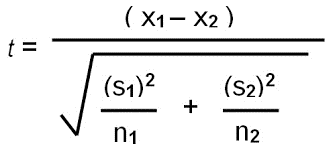

In [28]:
import math
LOS=0.05
numerator=mean_curr-mean_new
denominator=math.sqrt((var_curr/n1)+(var_new/n2))
T_value=numerator/denominator
print(T_value)

1.3283615935245674


### Calculating the Degrees of freedom 

In [29]:
DOF=n1+n2-2
print("The Degrees of freedom is",DOF)

The Degrees of freedom is 78


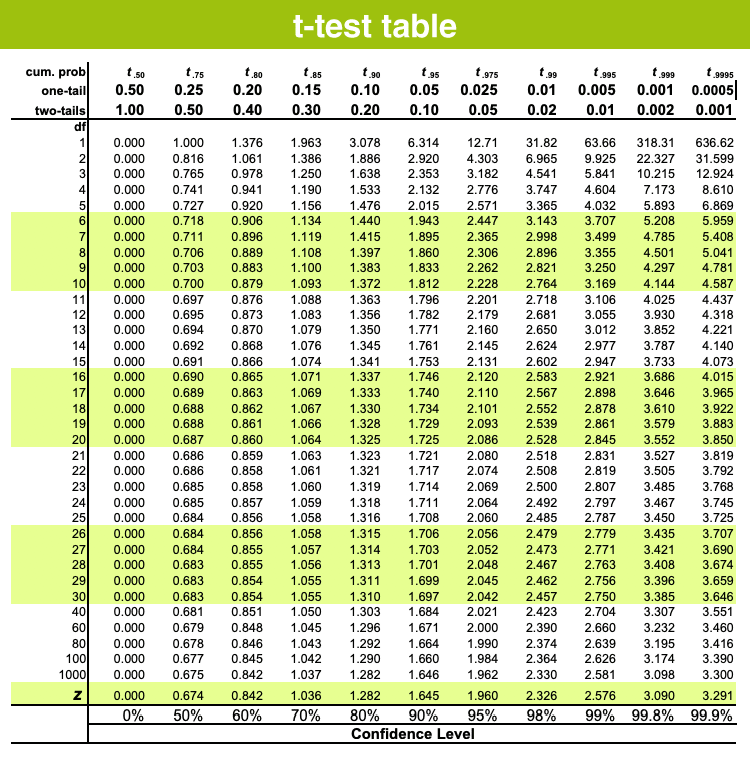

### Calculating P value from T value using Scipy library

In [30]:
import scipy.stats
P_value=scipy.stats.t.sf(abs(T_value), df=DOF)*2
print("P_value is",P_value)

P_value is 0.18793228491854672


## Conclusion

H<sub>0</sub> & H<sub>1</sub> <br>
1. Null Hypothesis: <br>
H0:µ<sub>old</sub>−µ<sub>new</sub>=0  <br>
New coating does not have effect on driving distance <br>
2. Alternate Hypothesis:<br>
H1:µ<sub>old</sub>−µ<sub>new</sub>≠0 <br>
New coating does have significant effect on driving distances <br>

3. Decision rule
P-value < 0.05 = statistically significant <br>
P-value > 0.05 = insignificant <br>

In [31]:
if P_value > LOS:
    print("Null hypothesis is Accepted i.e New coating does not have effect on driving distance")
else:
    print("Null hypothesis is Rejected and Alternate Hypothesis is accepted i.e New coating have effect on driving distance")
    

Null hypothesis is Accepted i.e New coating does not have effect on driving distance
